In [3]:
import os
os.chdir("/content/drive/My Drive/MNIST/rakam_tanima")
!pwd

/content/drive/My Drive/MNIST/rakam_tanima


In [4]:
!ls

rakam_tanimak.ipynb


In [5]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


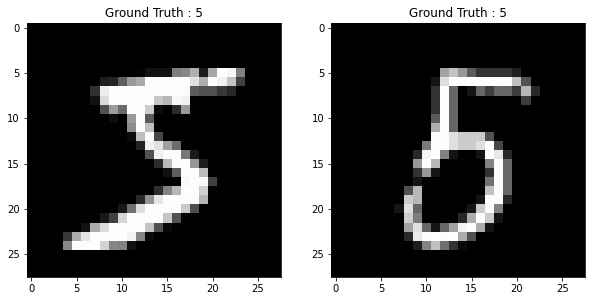

In [57]:
from keras.utils import to_categorical
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
# Find the unique numbers from the trpy ain labels

classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Eğitim setindeki ilk resimi çizdirelim
plt.subplot(121)
plt.imshow(train_images[0, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Test setindeki ilk resimi çizdirelim
plt.subplot(122)
plt.imshow(test_images[45, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[45]))
plt.show()

In [0]:
# Change from matrix to array of dimension 28x28 to array of #dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [0]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [11]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
hist = model.fit(train_data, train_labels_one_hot,batch_size=256, epochs=20, verbose=1,validation_data=(test_data,test_labels_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 10s 159us/step - loss: 0.2700 - acc: 0.9167 - val_loss: 0.1068 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0935 - acc: 0.9714 - val_loss: 0.0948 - val_acc: 0.9684
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0589 - acc: 0.9822 - val_loss: 0.0742 - val_acc: 0.9775
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0394 - acc: 0.9877 - val_loss: 0.1141 - val_acc: 0.9669
Epoch 5/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0288 - acc: 0.9908 - val_loss: 0.0742 - val_acc: 0.9800
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0220 - acc: 0.9930 - val_loss: 0.0701 - val_acc: 0.9818
Epoch 7/20
60000/60000 [

In [16]:
print(hist.history.keys())
[test_loss, test_acc] =model.evaluate(test_data,test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy {}".format(test_loss, test_acc))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
10000/10000 [==============================] - 1s 50us/step
Evaluation result on Test Data : Loss = 0.12483567140340077, accuracy 0.9836


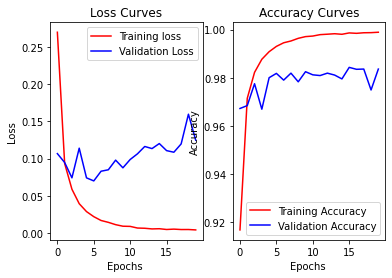

In [18]:
# Plot the Loss Curves
plt.subplot(121)
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')

# Plot the Accuracy Curves
plt.subplot(122)
plt.plot(hist.history['acc'], 'r')
plt.plot(hist.history['val_acc'], 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.show()

In [19]:
#dropout için yeniden düzenleme
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.3736 - acc: 0.8852 - val_loss: 0.1442 - val_acc: 0.9569
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1677 - acc: 0.9500 - val_loss: 0.1044 - val_acc: 0.9672
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.1312 - acc: 0.9612 - val_loss: 0.0957 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.1081 - acc: 0.9679 - val_loss: 0.0880 - val_acc: 0.9745
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0973 - acc: 0.9710 - val_loss: 0.0838 - val_acc: 0.9761
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0900 - acc: 0.9728 - val_loss: 0.0783 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0830 - acc: 0.9751 - val_loss: 0.0742 - val_acc

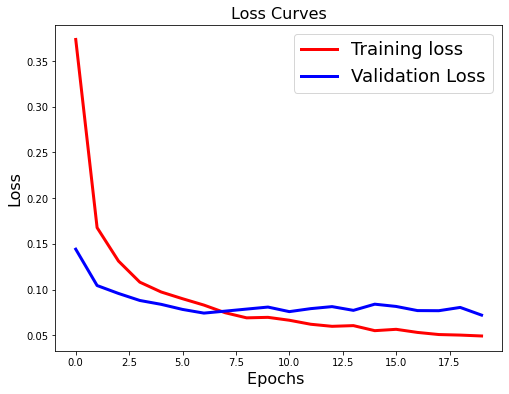

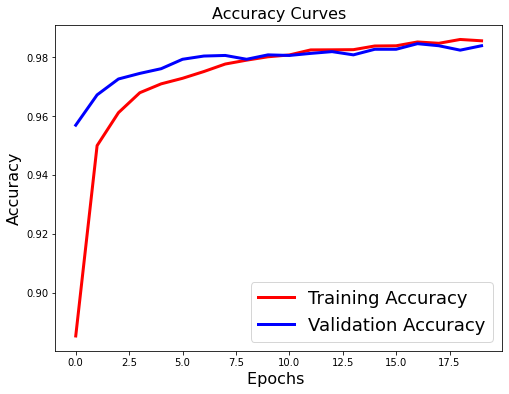

In [20]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,validation_data=(test_data, test_labels_one_hot))

# Plot the Loss Curves
plt.figure(figsize=[8, 6])
plt.plot(history_reg.history['loss'], 'r', linewidth=3.0)
plt.plot(history_reg.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Plot the Accuracy Curves
plt.figure(figsize=[8, 6])
plt.plot(history_reg.history['acc'], 'r', linewidth=3.0)
plt.plot(history_reg.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

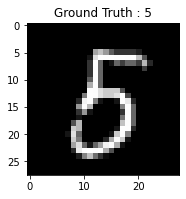

'\nlt.subplot(122)\nplt.imshow(test_images[45, :, :], cmap=\'gray\')\nplt.title("Ground Truth : {}".format(test_labels[45]))\nplt.show()'

In [61]:
plt.subplot(122)
plt.imshow(test_images[45, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[45]))
plt.show()
"""
lt.subplot(122)
plt.imshow(test_images[45, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[45]))
plt.show()"""

In [62]:
# Predict the most likely class
model_reg.predict_classes(test_data[[45],:])

array([5])

In [63]:
# # Predict the probabilities for each class
 model_reg.predict(test_data[[45],:])

array([[3.2523317e-20, 1.1249892e-18, 5.2338987e-20, 8.3171185e-09,
        6.1894565e-19, 1.0000000e+00, 6.8182374e-12, 1.9350961e-21,
        2.8078722e-11, 1.5563975e-10]], dtype=float32)